In [1]:
%pip install pandas requests matplotlib ace

import pandas as pd
import requests
import matplotlib.pyplot as plt
from config import API_KEY


[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
# Data Base creation 

# Base URL for the NASDAQ Data Link API
BASE_URL = 'https://data.nasdaq.com/api/v3/datasets/WIKI/'

# Function to fetch data from NASDAQ Data Link API
def fetch_data(dataset_code, api_key):
    """
    Fetches data for a given dataset code from the NASDAQ Data Link API.

    Args:
    - dataset_code (str): The dataset code for the stock (e.g., 'AAPL' for Apple).
    - api_key (str): The API key for authenticating the request.

    Returns:
    - dict: The JSON response containing the stock data.
    """
    url = f"{BASE_URL}{dataset_code}.json"
    params = {'api_key': api_key}
    response = requests.get(url, params=params)
    if response.status_code == 200:
        return response.json()
    else:
        response.raise_for_status()

# Fetch data for NVIDIA, Google, and Apple
dataset_codes = ['NVDA', 'GOOGL', 'AAPL']
data = {code: fetch_data(code, API_KEY) for code in dataset_codes}

# Create DataFrames from the data
dfs = {}
for code in dataset_codes:
    # Extract column names and data rows from the JSON response
    column_names = data[code]['dataset']['column_names']
    rows = data[code]['dataset']['data']
    
    # Create a DataFrame from the data
    df = pd.DataFrame(rows, columns=column_names)
    
    # Convert the 'Date' column to datetime
    df['Date'] = pd.to_datetime(df['Date'])
    
    # Add a 'Stock' column to identify the stock
    df['Stock'] = code
    
    # Store the DataFrame in the dictionary
    dfs[code] = df

# Retain only necesary columns
nvidia_df = dfs['NVDA'][['Date', 'Stock', 'Open', 'High', 'Low', 'Close', 'Volume']]
google_df = dfs['GOOGL'][['Date', 'Stock', 'Open', 'High', 'Low', 'Close', 'Volume']]
apple_df = dfs['AAPL'][['Date', 'Stock', 'Open', 'High', 'Low', 'Close', 'Volume']]

# Combine the dataframes
combined_df = pd.concat([nvidia_df, google_df, apple_df])

combined_df

# Save data into a CSV file
csv_path = 'combined_data.csv'
combined_df.to_csv(csv_path, index=False)

Stock
AAPL    1980-12-12
GOOGL   2004-08-19
NVDA    1999-01-22
Name: Date, dtype: datetime64[ns]


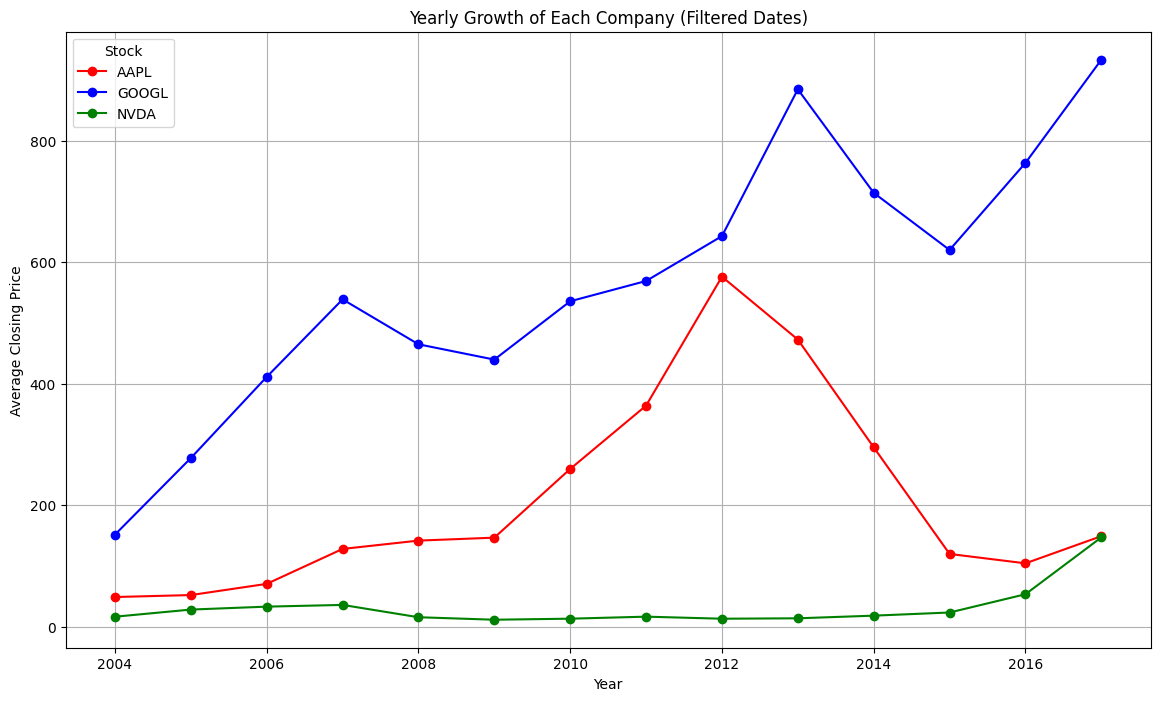

In [24]:
# Filter the data to include only dates where all companies are in business

# Check the earliest date for each company
earliest_dates = combined_data.groupby('Stock')['Date'].min()
print(earliest_dates)

# Find the latest earliest date among the companies
start_date = earliest_dates.max()
end_date = pd.Timestamp('2017-12-12')

# Filter the combined_data for the date range
filtered_data = combined_data[(combined_data['Date'] >= start_date) & (combined_data['Date'] <= end_date)]

# Group by Year and Stock and calculate the mean Close price
filtered_yearly_growth = filtered_data.groupby(['Year', 'Stock'])['Close'].mean().unstack()

# Define the colors for each company
colors = {
    'NVDA': 'green',
    'AAPL': 'red',
    'GOOGL': 'blue'
}

# Plot the data with specified colors
plt.figure(figsize=(14, 8))
for stock in filtered_yearly_growth.columns:
    plt.plot(filtered_yearly_growth.index, filtered_yearly_growth[stock], marker='o', label=stock, color=colors[stock])

plt.title('Yearly Growth of Each Company (Filtered Dates)')
plt.xlabel('Year')
plt.ylabel('Average Closing Price')
plt.legend(title='Stock')
plt.grid(True)
plt.show()
